In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from apyori import apriori
import os
import sys
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
import copy
from copy import deepcopy

/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
printing_mode = True

On importe le travail préalable

In [139]:
#merged_data.to_csv('out.csv')

In [140]:
#%run import_data

merged_data = pd.read_csv('out.csv')

Les variables qui, d'un premier abord, semblent inutiles.

In [141]:
colonnes_inutiles = ['num_veh','Num_Acc',
                                'locp',
                                'actp',
                                'etatp',
                                'catv',
                                'hrmn',
                                'mois',
                                'jour',
                                'catvopp',
                                'occutc',
                                'place']

merged_data = merged_data.drop(colonnes_inutiles,axis = 1)


df = pd.get_dummies(merged_data, columns = merged_data.columns)
results = list(apriori(df))

y = merged_data.grav
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

KeyboardInterrupt: 

Mise en place d'apriori sur les données des décédés

In [57]:
def apriori_own(data_accident, min_sup=0.40, min_conf=0.90):
    
    listing_apriori_bis = []

    for indexe in data_accident.index:
        event = []
        for colonne in data_accident.columns:
            if not (data_accident[colonne][indexe] == 0):
                event.append(colonne + str(data_accident[colonne][indexe]))
        listing_apriori_bis.append(event)

    results_apriori_decedes = list(apriori(listing_apriori_bis, min_support = min_sup, min_confidence = min_conf))

    tableau_apriori = []

    for x in range(0,len(results_apriori_decedes)):
        event = [list(results_apriori_decedes[x].items), results_apriori_decedes[x].support, results_apriori_decedes[x].ordered_statistics[0].confidence]
        tableau_apriori.append(event)

    tableau_apriori = pd.DataFrame(tableau_apriori, columns=['transaction','support','confiance'])
    os.system('say "fini"')
    return tableau_apriori
all_in = apriori_own(merged_data_sans_grav)
deads = apriori_own(merged_data[merged_data.grav == 2].drop('grav', axis=1))
safes = apriori_own(merged_data[merged_data.grav == 1].drop('grav', axis=1))

In [69]:
association_all = list(all_in.transaction)
association_safes = list(safes.transaction)
association_deads = list(deads.transaction)

ad = intersection_2_listes(association_all, association_deads)
asa = intersection_2_listes(association_all,association_safes)
ds = intersection_2_listes(association_deads,association_safes)

In [68]:
def intersection_2_listes(L1, L2):
    """List[Int] * List[Int] -> List[Int]
    Retourne l'intersection des deux listes L1 et L2."""
 
    result = []
 
    for n in L1:
        for x in L2:
            if n == x and n not in result:
                result.append(n)
    result.sort()
 
    return result

In [70]:
ad

[['catv_gen2', 'secu11.0']]

In [71]:
asa

[['catu1', 'catv_gen2', 'secu11.0'], ['catv_gen2', 'secu11.0', 'agg1']]

In [72]:
ds

[]

In [73]:
accidents_grave = merged_data[merged_data.grav == 2].drop('grav',axis = 1)
df_accidents_graves = pd.get_dummies(merged_data, columns = merged_data.columns)
pourcentage_basique =  len(accidents_grave) / len(merged_data) 
seuil_sgdiscovery = len(accidents_grave) * 0.1
pourcentage_seuil = pourcentage_basique * 2
results_apriori_accidents_grave = list(apriori(df_accidents_graves,min_support = pourcentage_seuil))

In [74]:
print(len(results_apriori_accidents_grave))
print(seuil_sgdiscovery)
print('--------')
if len(results_apriori_accidents_grave)>seuil_sgdiscovery:
    print('  *-*')
print('--------')


713
195.5
--------
  *-*
--------


In [79]:
def PCTg(tableau):
    result = len(tableau[tableau.grav == 2]) / len(tableau)
    return result

def donnees_contraintes(contraintes):
    global merged_data
    table = copy.deepcopy(merged_data)
    for cont in contraintes:
        
        print('ok')
        table = table[table[cont[0]] == cont[1]]
    return table

liste_colonnes = merged_data.columns


premier_essai = PCTg(donnees_contraintes([['catu',2],['mom',3]]))
        
print(premier_essai)
        
        

ok
ok
0.048294195835179445


In [111]:
colonnes_inutiles = ['num_veh',
                     'Num_Acc',
                     'locp',
                     'actp',
                     'etatp',
                     'catv',
                     'hrmn',
                     'mois',
                     'jour',
                     'catvopp',
                     'occutc',
                     'place']
df_intermediaire = merged_data.drop(colonnes_inutiles,axis = 1)
df = pd.get_dummies(merged_data, columns = merged_data.columns)

df.to_csv('/Users/ppx/Desktop/item.csv')

In [109]:
df

,catu_1,catu_2,catu_3,catu_4,grav_1,grav_2,grav_3,grav_4,sexe_1,sexe_2,...,mom_4,mom_5,catv_gen_0,catv_gen_1,catv_gen_2,catv_gen_3,catvopp_gen_0,catvopp_gen_1,catvopp_gen_2,catvopp_gen_3
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
6,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
7,1,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
8,0,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
9,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


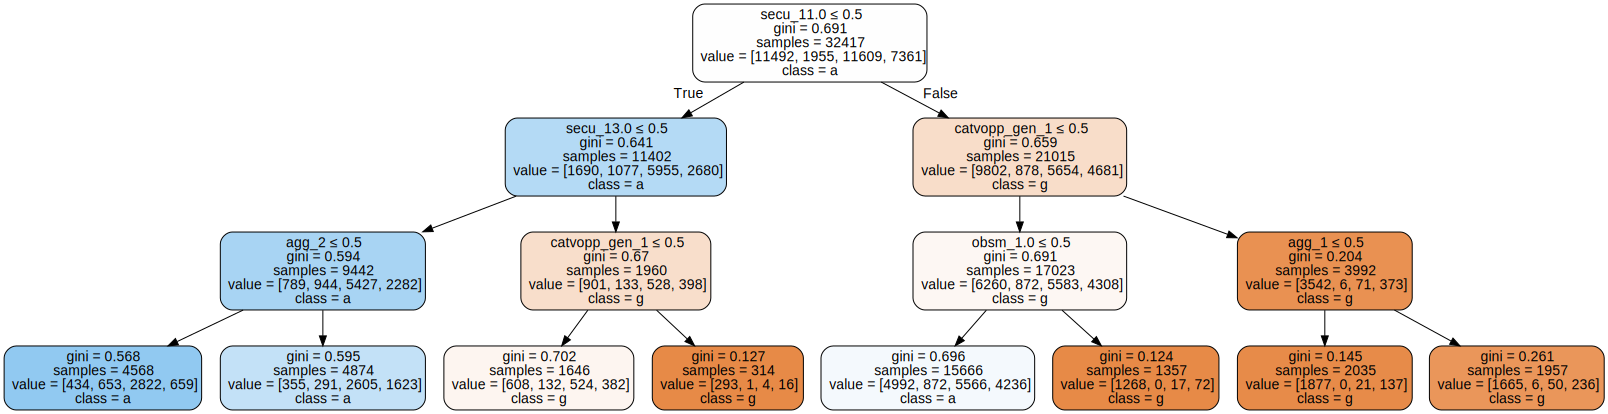

In [138]:
graph

In [86]:
os.system('say "fini"')

0

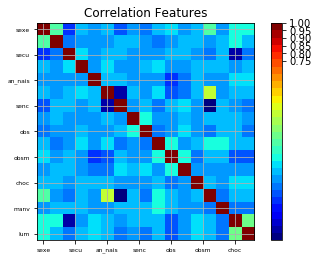

In [125]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Features')
    labels=df.columns###['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(merged_data_sans_grav)